# KNN算法（K-Nearest Neighbors）

- KNN算法是一种基本且常用的机器学习算法，主要用于分类和回归任务。它基于“近邻”思想，即通过测量数据点之间的距离来进行预测。以下是KNN算法的基本原理和步骤：

### 基本思想

- 如果一个样本，在特征空间中的**k个最相似的样本**中的大多数属于某一个类别，则该样本也属于这个类别。一般来通过两个样本之间的距离来确定它们的相似程度。

### 距离计算公式

#### 欧氏距离(Euclidean distance)

欧几里得度量(euclidean metric)(也称欧氏距离)是一个通常采用的距离定义，指在$m$维空间中两个点之间的真实距离，或者向量的自然长度(即该点到原点的距离)。在二维和三维空间中的欧氏距离就是两点之间的实际距离。

距离公式：

$$
d\left( x,y \right) = \sqrt{\sum_{i}^{}(x_{i} - y_{i})^{2}}
$$

![img](images/16333182861.jpg)

# KNN算法（K Nearest Neighbor）

1．$k$近邻法是基本且简单的分类与回归方法。$k$近邻法的基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的$k$个最近邻训练实例点，然后利用这$k$个训练实例点的类的多数来预测输入实例点的类。

2．$k$近邻模型对应于基于训练数据集对特征空间的一个划分。$k$近邻法中，当训练集、距离度量、$k$值及分类决策规则确定后，其结果唯一确定。

3．$k$近邻法三要素：距离度量、$k$值的选择和分类决策规则。常用的距离度量是欧氏距离。$k$值小时，$k$近邻模型更复杂；$k$值大时，$k$近邻模型更简单。$k$值的选择反映了对近似误差与估计误差之间的权衡，通常由交叉验证选择最优的$k$。

常用的分类决策规则是多数表决，对应于经验风险最小化。

4．$k$近邻法的实现需要考虑如何快速搜索k个最近邻点。**kd**树是一种便于对k维空间中的数据进行快速检索的数据结构。kd树是二叉树，表示对$k$维空间的一个划分，其每个结点对应于$k$维空间划分中的一个超矩形区域。利用**kd**树可以省去对大部分数据点的搜索， 从而减少搜索的计算量。

## KNN算法的优缺点：

优点|缺点
---|---
简单易用|计算复杂度高
无需训练|对噪声敏感
适用于多分类任务|需要选择合适的K值

### 注意

- K值过小：用较小邻域中的训练实例进行预测，会导致模型容易受到异常点的影响，K值的减小意味着整体模型变得更加复杂（过度分析某一条样本），容易发生过拟合
- K值过大：用较大的邻域中的训练实例进行预测，容易受到样本均衡问题，且K值过大意味着整体模型变得简单，容易发生欠拟合

### KNN算法流程：

- 回归任务：
    1. 计算未知样本到每一个训练样本的距离
    2. 将训练样本根据距离大小进行升序排列
    3. 取出距离最近的K个训练样本
    4. 把这K个样本的目标值**计算其平均值**
    5. 平均值作为将未知的样本预测的值

- 分类任务：
    1. 计算未知样本到每一个训练样本的距离
    2. 将训练样本根据距离大小进行升序排列
    3. 取出距离最近的K个训练样本
    4. 进行**多数表决**，统计K个样本中哪个类别的样本个数最多
    5. 作为将未知的样本归属到出现次数最多的类别

In [3]:
"""

KNN算法分类任务实现

以鸢尾花数据集为例

流程为：
    1. 加载数据（获取数据集）
    2. 数据的预处理
    3. 特征工程
    4. 模型训练
    5. 模型评估
    6. 模型预测
"""

# 导入相关依赖包

from sklearn.datasets import load_iris # 导入鸢尾花数据集

import seaborn as sns # 导入seaborn绘图库
import pandas as pd # 导入数据处理依赖库
import matplotlib.pyplot as plt # 导入绘图库

from sklearn.model_selection import train_test_split # 分割数据集
from sklearn.preprocessing import StandardScaler # 数据标准化
from sklearn.neighbors import KNeighborsClassifier # KNN算法的分类器
from sklearn.metrics import accuracy_score # 模型评估，计算模型准确率


# 1. 加载数据集，并查看数据集

iris = load_iris()

# print(iris) # 返回的是一个json数据的内容

# 检查数据集所有的键：
print(f"数据集中所有的键为:{iris.keys()}")

数据集中所有的键为:dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


1. 数据集中存在很多个键，其中我们关心的内容分别为以下内容：

键|对应
---|---
data|数据（所有的属性值）
feature_names|特征名称
target|目标标签
target_names|标签对应的名称

2. 其中共有150条数据，我们只需要看前n条即可，不用全看

In [4]:
print(f"具体的数据为：{iris.data[:10]}")
print(f"具体的标签为：{iris.target[:10]}")
print(f"标签对应的名称为：{iris.target_names}")
print(f"特征对应的名称为：{iris.feature_names}")

具体的数据为：[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
具体的标签为：[0 0 0 0 0 0 0 0 0 0]
标签对应的名称为：['setosa' 'versicolor' 'virginica']
特征对应的名称为：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# 其他键名对应的内容
print(f"数据集的描述:{iris.DESCR}")

数据集的描述:.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 class

In [6]:
print(f"数据集的框架{iris.frame}")
print(f"数据集的文件名{iris.filename}")
print(f"数据集的模型（在哪个包下）:{iris.data_module}")

数据集的框架None
数据集的文件名iris.csv
数据集的模型（在哪个包下）:sklearn.datasets.data


## 可视化数据集

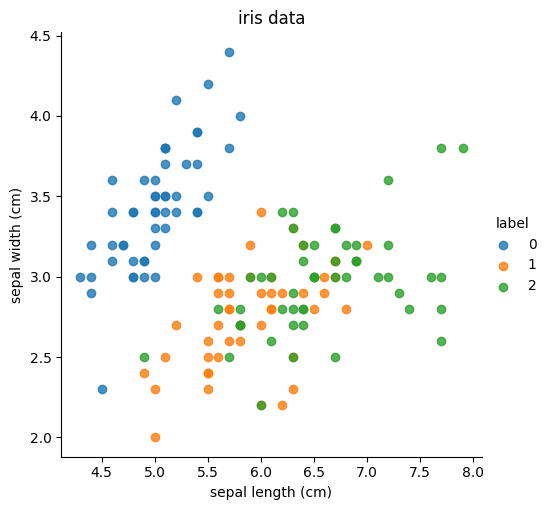

In [7]:

# 将数据集封装成dataframe格式的对象
# DataFrame是一种二维表格型数据结构，类似于电子表格或SQL表，是数据分析中最常用的数据容器之一。
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# 给数据增加新的”标签“列
df_iris['label'] = iris.target

# 绘制散点图
# hue表示是否按照标签划分不同颜色
# fit_reg表示是否要拟合回归线
sns.lmplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', hue='label', fit_reg=False)
# 设置标题
plt.title('iris data')
plt.show()

## 数据集划分

- 因为这个数据集已经是干净的数据集，无需进行处理，只需直接划分数据集即可

In [8]:
# 划分数据集
# 特征数据，标签数据
# test_size为测试集所占比例
# 该函数返回顺序为：训练集特征数据，测试集特征数据，训练集标签数据，测试集标签数据
# ramdom_state为随机数种子，保证每次划分结果一致,如果不指定随机种子，每次运行结果可能不同
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=66)

print(f"训练集的特征：{x_train}, 个数为：{len(x_train)}") # 一共120条数据，每条数据4个特征
print(f"测试集的特征：{x_test}, 个数为：{len(x_test)}") # 一共30条数据，每条数据4个特征
print(f"训练集的标签：{y_train}, 个数为：{len(y_train)}") # 一共120个标签
print(f"测试集的标签：{y_test}, 个数为：{len(y_test)}") # 一共30个标签

训练集的特征：[[5.  3.  1.6 0.2]
 [5.4 3.9 1.7 0.4]
 [6.3 2.9 5.6 1.8]
 [5.1 3.8 1.6 0.2]
 [5.4 3.  4.5 1.5]
 [5.  3.4 1.6 0.4]
 [5.9 3.  4.2 1.5]
 [5.3 3.7 1.5 0.2]
 [6.7 3.  5.  1.7]
 [5.7 2.8 4.1 1.3]
 [5.1 3.7 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [6.5 3.  5.8 2.2]
 [5.8 2.7 3.9 1.2]
 [6.3 3.3 4.7 1.6]
 [5.6 2.5 3.9 1.1]
 [5.8 4.  1.2 0.2]
 [6.  3.4 4.5 1.6]
 [6.2 2.2 4.5 1.5]
 [6.7 3.1 5.6 2.4]
 [6.4 3.2 5.3 2.3]
 [4.9 3.6 1.4 0.1]
 [5.8 2.7 5.1 1.9]
 [6.2 2.8 4.8 1.8]
 [6.7 3.3 5.7 2.5]
 [7.9 3.8 6.4 2. ]
 [4.6 3.6 1.  0.2]
 [7.4 2.8 6.1 1.9]
 [4.6 3.2 1.4 0.2]
 [7.7 3.  6.1 2.3]
 [4.6 3.1 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [6.3 2.7 4.9 1.8]
 [5.2 3.4 1.4 0.2]
 [4.4 3.  1.3 0.2]
 [7.7 2.6 6.9 2.3]
 [5.5 2.4 3.7 1. ]
 [4.7 3.2 1.6 0.2]
 [4.9 3.  1.4 0.2]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [4.8 3.1 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [6.4 2.8 5.6 2.1]
 [5.7 4.4 1.5 0.4]
 [5.6 3.  4.1 1.3]
 [5.8 2.7 4.1 1. ]
 [6.  2.2 4.  1. ]
 [6.3 3.3 6.  2.5]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.9 3.  5.1 1.8]
 [6.9

## 特征工程

- 原本数据已经只有4个特征，无需进行特征提取
- 但是需要进行特征预处理，对数据进行标准化或者归一化处理

In [9]:
# 数据标准化
transformer = StandardScaler()
# 仅对特征列进行标准化，即：对x_train和x_test进行标准化
x_train = transformer.fit_transform(x_train) # fit_transform表示先拟合数据，再进行转换，是对训练集进行标准化，仅在第一次标准化时使用，一般用于处理训练集
x_test = transformer.transform(x_test) # transform表示直接转换，在重新进行标准化的时候使用，一般用于处理测试集

# 构建KNN分类器
knn_class = KNeighborsClassifier(n_neighbors=3) # n_neighbors表示选择的K值，我们先默认写一个超参数K设置为3

# 模型训练
knn = knn_class.fit(x_train, y_train)

# 模型预测
y_pred = knn.predict(x_test)

# 模型评估

# 直接评分：基于训练集特征和训练集标签
train_score = knn.score(x_train, y_train)
print(f"训练集上的评分（准确率）为：{train_score}")

# 基于测试集的标签和预测结果进行评分
test_accuracy = accuracy_score(y_test, y_pred)
print(f"测试集上的准确率为：{test_accuracy}")

训练集上的评分（准确率）为：0.9666666666666667
测试集上的准确率为：0.9
